In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Clustering analysis

Use various clustering techniques to identify a good subset of questions.

---

In [2]:
import os
import sys

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
YEAR = 2008

In [4]:
df = pd.read_csv("../data/processed/{}.csv".format(YEAR), index_col=0)

---

## Correlations in data

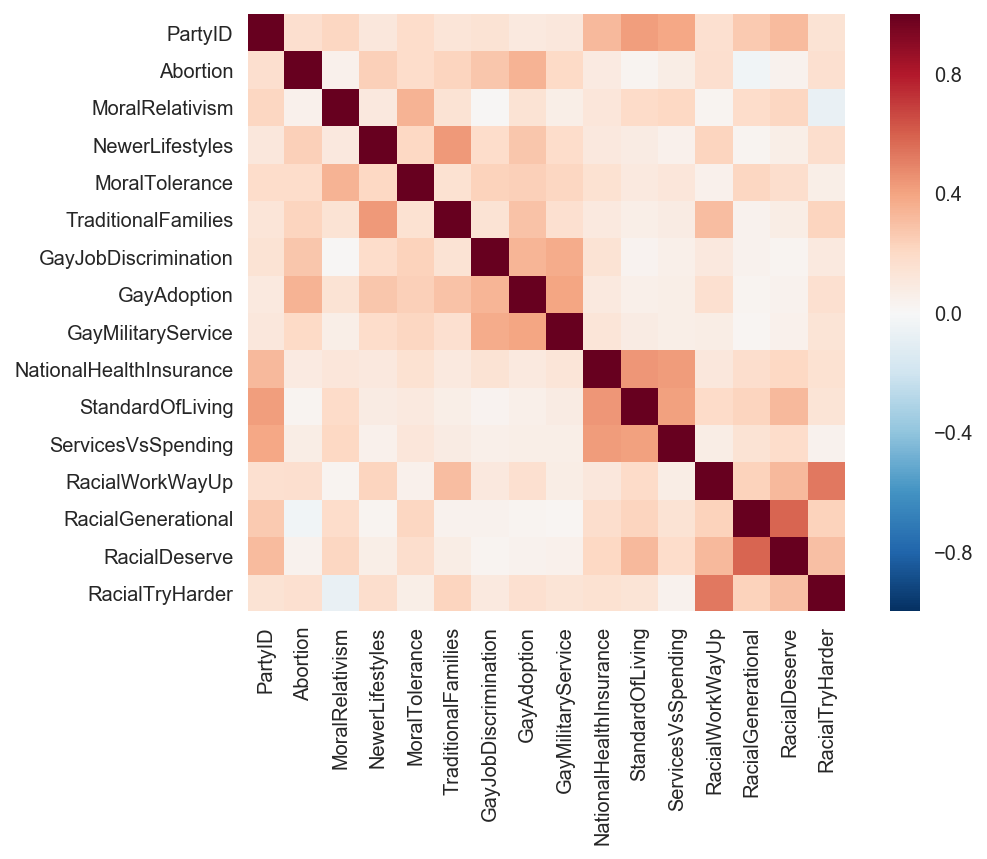

In [5]:
# Spearman is recommended for ordinal data.
correlations = df.corr(method='spearman')
sns.heatmap(correlations,
           square=True);

Note that if we were to scale the data, the correlation matrix would be unchanged.

/Users/Arya/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



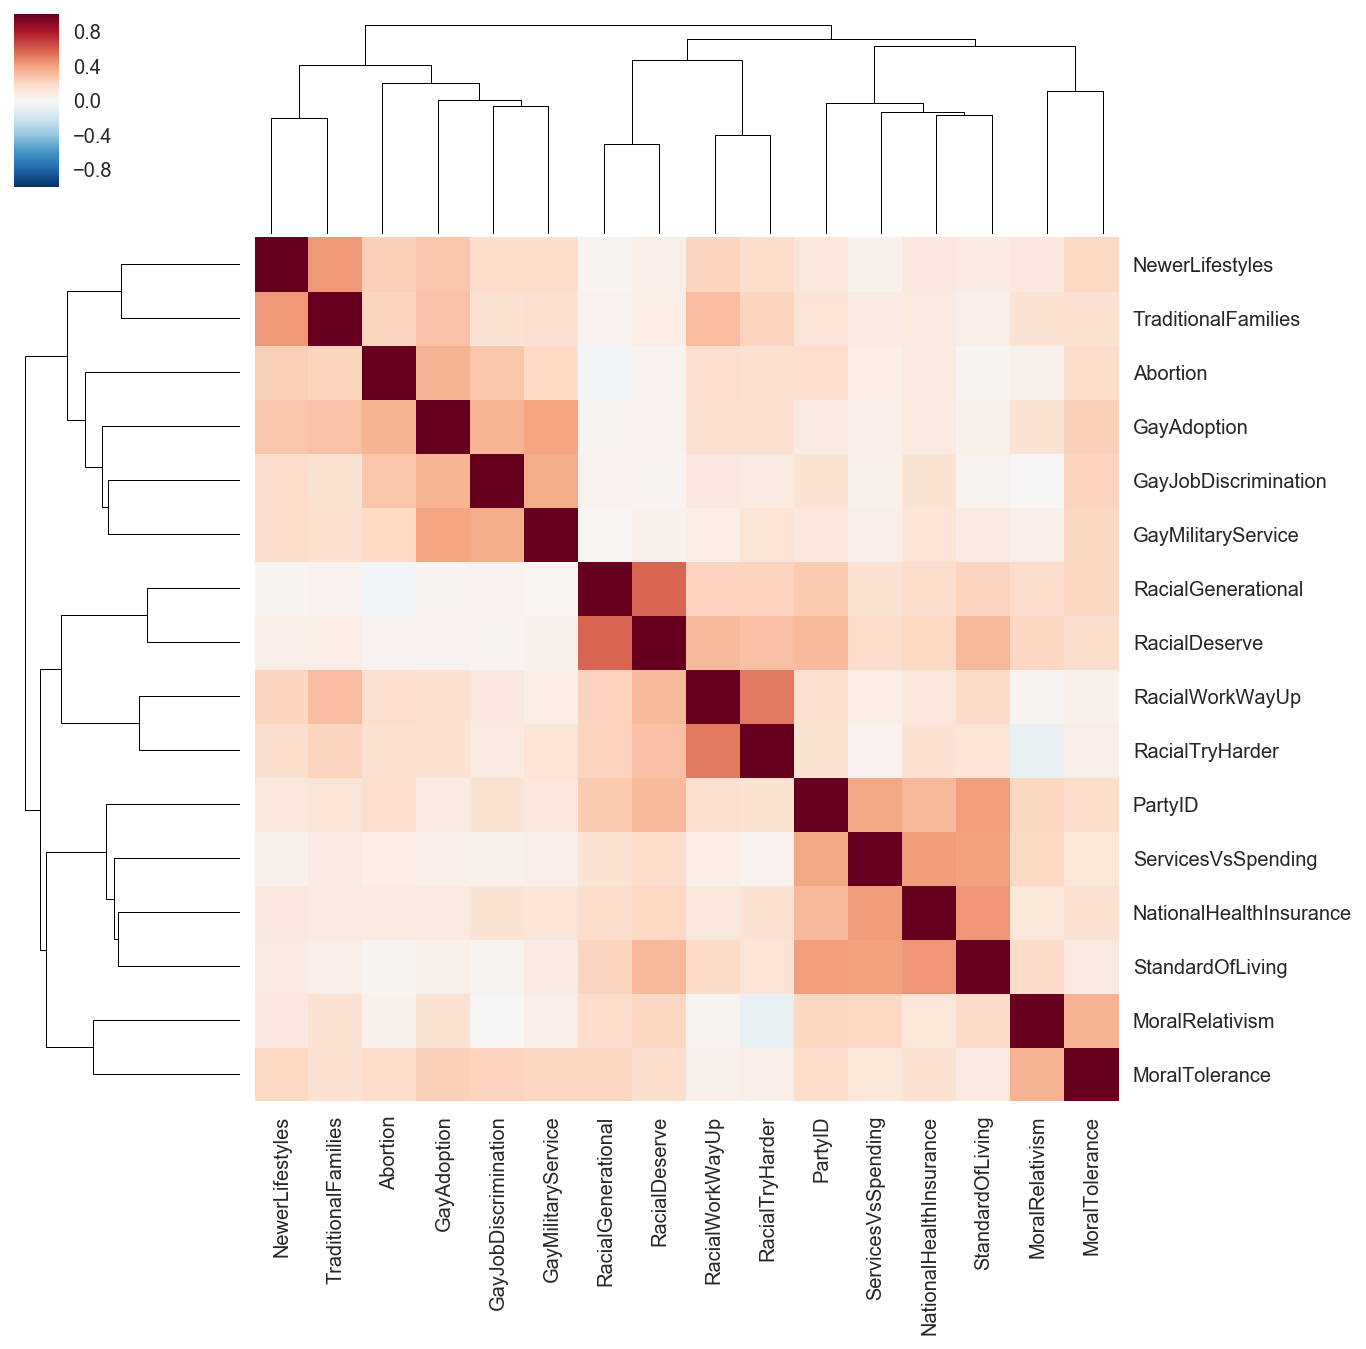

In [6]:
cg = sns.clustermap(correlations, square=True)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),
        rotation=0);  # Fix rotation of y-labels.

The expected clusters emerged. Party ID got grouped with economics more than with moral attitudes. Economics and race line up with one another.

## Principal component analysis

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer, StandardScaler

imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df)
_scaled = scaler_pipeline.transform(df)

### Explained variance

How much of the variance in the data is explained by each successive component?

In [8]:
plot_explained_variance(pca)

### Biplot

A scatterplot projected onto the first two principal components.

In [9]:
data_scaled = pd.DataFrame(_scaled, columns=df.columns)
triplot(pca, data_scaled, title='ANES {} Biplot'.format(YEAR), color=data_scaled.PartyID)

In [10]:
biplot(pca, data_scaled, title='ANES {} Biplot'.format(YEAR), color=data_scaled.PartyID)

In [11]:
pca.explained_variance_

array([ 3.24529503,  1.93370301,  1.56353348,  1.34978511,  1.08325705,
        0.88124944,  0.74674015,  0.73441382,  0.67554389,  0.63809309,
        0.61653412,  0.58413484,  0.57571212,  0.53315994,  0.43860813,
        0.40023678])

## Dropping na

In [12]:
df2 = df.dropna()
#imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
#        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
#        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df2)
_scaled = scaler_pipeline.transform(df2)
data_scaled = pd.DataFrame(_scaled, columns=df.columns)

In [13]:
biplot(pca, data_scaled, title='ANES {} Biplot'.format(YEAR), color=data_scaled.PartyID)

In [14]:
plot_explained_variance(pca)